# Analysis on CDKN2A Gene Therapy

### Presented By:QANY



## **Import datas and necessary library**

In [22]:
import pandas as pd
import re
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from ipywidgets import interact, IntSlider
import time
from IPython.display import clear_output
import ipywidgets as widgets
import networkx as nx
import spacy
from wordcloud import WordCloud

articles = pd.read_csv("articles.CDKN2A.csv")
authors = pd.read_csv("authors.CDKN2A.csv")
paper = pd.read_csv("paper_counts.csv")


## **Top 10 Active Researchers over the years**

In [23]:
# Merge the 'articles' and 'authors' dataframes on 'PMID'
merged_all = pd.merge(articles, authors, on='PMID')

# Concatenate 'AuthorLastname' and 'AuthorForename' to create a full author name
merged_all['FullAuthorName'] = merged_all['AuthorLastname'] + ', ' + merged_all['AuthorForename']

# Count occurrences of each author across all years
author_counts_df = merged_all['FullAuthorName'].value_counts().reset_index()
author_counts_df.columns = ['Author', 'Count']

# Sort the dataframe by count in descending order
author_counts_df = author_counts_df.sort_values(by='Count', ascending=False)

# Extract the top 10 active researchers
top_10_active_researchers = author_counts_df.head(10)

#Print the top 10 active researchers
print(top_10_active_researchers)


                Author  Count
0   Goldstein, Alisa M     50
1   Tucker, Margaret A     38
2  Hayward, Nicholas K     37
3       Ghiorzo, Paola     36
4      Hruban, Ralph H     31
5    Bishop, D Timothy     28
6     Fuchs, Charles S     27
7        Harland, Mark     27
8         Ogino, Shuji     26
9       Mann, Graham J     26


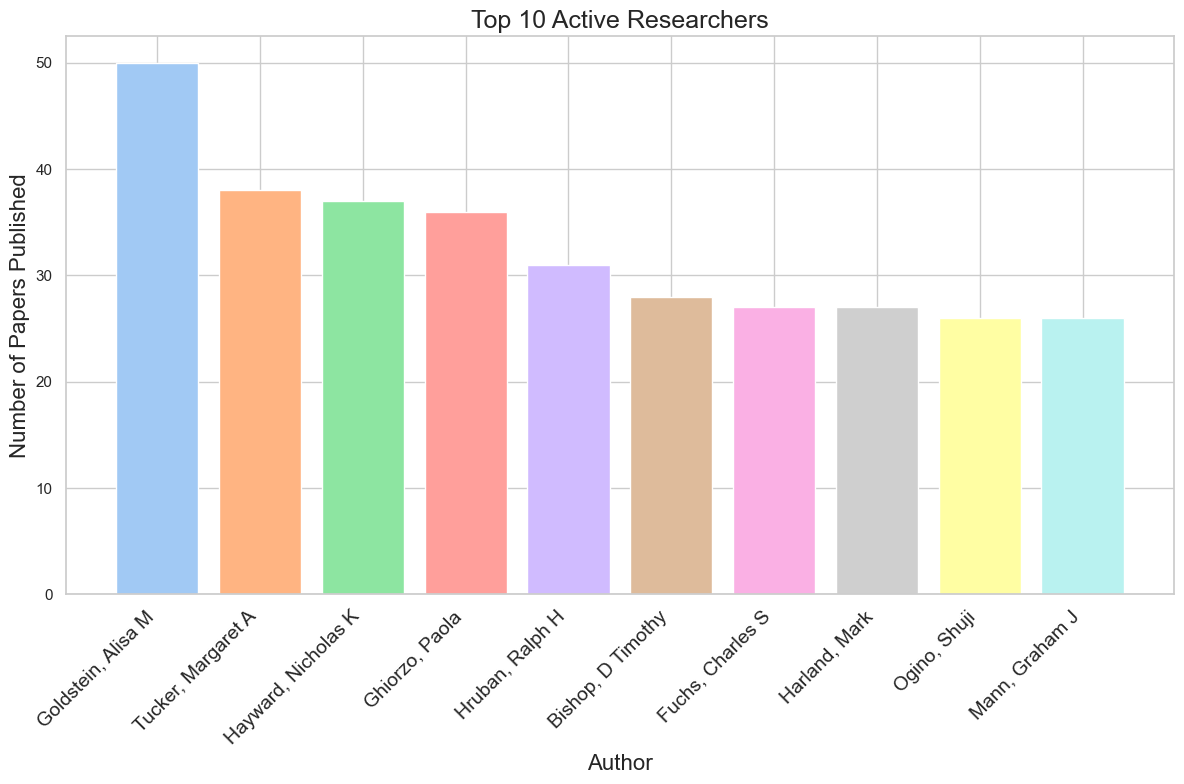

In [ ]:
import seaborn as sns

sns.set(style="whitegrid") #Define the grid of the graph

plt.figure(figsize=(12, 8)) #Size of the graph
colors = sns.color_palette("pastel")  #Define the palette of the graph

plt.bar(top_10_active_researchers['Author'], top_10_active_researchers['Count'], color=colors) #Parameters of the graph

plt.xlabel('Author', fontsize=16) #Label the x-axis and font-size
plt.ylabel('Number of Papers Published', fontsize=16) #Label the y-axis and font-size
plt.title('Top 10 Active Researchers', fontsize=18) #Label the title of the graph and font size

plt.xticks(rotation=45, ha='right', fontsize=14) # Rotating x-axis labels for better readability

plt.tight_layout() #Define the layout

plt.show() #Display the plot



## **Top researchers who were actively working the last 5 years**

In [ ]:
#Articles published in the last 5 years
current_year=2024

last_5_years_paper= articles[articles['Year'] >= current_year -5]
last_5_years_paper

PMID                                              Title  \
2136  28802642  Prognostic Value of TERT Alterations, Mutation...   
2231  29489509  The Amount of Melanin Influences p16 Loss in S...   
2284  29915929  Identification of miR-146a is Associated with ...   
2298  29966470  Deletion of CDKN2A/B is associated with inferi...   
2306  30009659  Primary Esophageal Mixed Sarcomatoid and Small...   
...        ...                                                ...   
3409  38067238  Validation of a Gene Expression Approach for t...   
3410  38070141  Has-miR-300-GADD45B promotes melanoma growth v...   
3411  38079020  "De novo replication repair deficient glioblas...   
3412  38091828  Dry and wet experiments reveal diagnostic clus...   
3413  38095311  Compliant substrates mitigate the senescence a...   

                                               Abstract       ISSN  \
2136  Point mutations in the TERT gene promoter occu...  2405-4569   
2231  The risk assessment of spitzoid lesions is one...  1533-4058   
2284  There is emerging evidence that some microRNAs...  1532-2807   
2298  Considering conflicting data on CDKN2A/B delet...  1029-2403   
2306  Mixed carcinomas in the esophagus are highly u...  1940-2465   
...                                                 ...        ...   
3409  Cytological diagnosis of pleural mesothelioma ...  2072-6694   
3410  Response to oncogenic factors like UV, GADD45 ...  1945-4589   
3411  Glioblastoma is a clinically and molecularly h...  1432-0533   
3412  Cuproptosis is a new manner of mitochondrial c...  1878-1705   
3413  Mesenchymal stromal cells (MSCs) are a promisi...  1552-4965   

                                                Journal  \
2136                             European urology focus   
2231  Applied immunohistochemistry & molecular morph...   
2284                  Pathology oncology research : POR   
2298                                Leukemia & lymphoma   
2306        International journal of surgical pathology   
...                                                 ...   
3409                                            Cancers   
3410                                              Aging   
3411                              Acta neuropathologica   
3412                   International immunopharmacology   
3413   Journal of biomedical materials research. Part A   

                   Location  Year FirstAuthorForename   FirstAuthorLastname  \
2136            (5) 201-204  2019               Sumit              Isharwal   
2231           (27) 423-429  2019            Carolina  Martinez Ciarpaglini   
2284           (26) 245-251  2020             Yanping                 Zhang   
2298           (60) 433-441  2019                   M            Kathiravan   
2306             (27) 84-88  2019       Christopher J              Schwartz   
...                     ...   ...                 ...                   ...   
3409                   5534  2023            Rossella                 Bruno   
3410  10.18632/aging.205276  2023                Long                  Chen   
3411                (147) 3  2023                Sara                 Hadad   
3412           (127) 111326  2023                Peng                 Zhang   
3413    10.1002/jbm.a.37657  2023          Robert C H               Gresham   

     FirstAuthorInitials                             FirstAuthorAffiliation  
2136                   S  Urology Service, Department of Surgery, Memori...  
2231                   C             Biomedical Research Institute INCLIVA.  
2284                   Y  Department of Clinical Medicine, Changde Vocat...  
2298                   M  a Paediatric Haematology-Oncology Unit , Post ...  
2306                  CJ  1 New York University Medical Center, New York...  
...                  ...                                                ...  
3409                   R  Unit of Pathological Anatomy, University Hospi...  
3410                   L  Department of Burn Plastic and C

In [ ]:
#Extract the authors of those papers

last_5_year_authors= pd.merge(last_5_years_paper, authors, on='PMID', how='inner')
last_5_year_authors

PMID                                              Title  \
0      28802642  Prognostic Value of TERT Alterations, Mutation...   
1      28802642  Prognostic Value of TERT Alterations, Mutation...   
2      28802642  Prognostic Value of TERT Alterations, Mutation...   
3      28802642  Prognostic Value of TERT Alterations, Mutation...   
4      28802642  Prognostic Value of TERT Alterations, Mutation...   
...         ...                                                ...   
11713  38095311  Compliant substrates mitigate the senescence a...   
11714  38095311  Compliant substrates mitigate the senescence a...   
11715  38095311  Compliant substrates mitigate the senescence a...   
11716  38095311  Compliant substrates mitigate the senescence a...   
11717  38095311  Compliant substrates mitigate the senescence a...   

                                                Abstract       ISSN  \
0      Point mutations in the TERT gene promoter occu...  2405-4569   
1      Point mutations in the TERT gene promoter occu...  2405-4569   
2      Point mutations in the TERT gene promoter occu...  2405-4569   
3      Point mutations in the TERT gene promoter occu...  2405-4569   
4      Point mutations in the TERT gene promoter occu...  2405-4569   
...                                                  ...        ...   
11713  Mesenchymal stromal cells (MSCs) are a promisi...  1552-4965   
11714  Mesenchymal stromal cells (MSCs) are a promisi...  1552-4965   
11715  Mesenchymal stromal cells (MSCs) are a promisi...  1552-4965   
11716  Mesenchymal stromal cells (MSCs) are a promisi...  1552-4965   
11717  Mesenchymal stromal cells (MSCs) are a promisi...  1552-4965   

                                                Journal             Location  \
0                                European urology focus          (5) 201-204   
1                                European urology focus          (5) 201-204   
2                                European urology focus          (5) 201-204   
3                                European urology focus          (5) 201-204   
4                                European urology focus          (5) 201-204   
...                                                 ...                  ...   
11713  Journal of biomedical materials research. Part A  10.1002/jbm.a.37657   
11714  Journal of biomedical materials research. Part A  10.1002/jbm.a.37657   
11715  Journal of biomedical materials research. Part A  10.1002/jbm.a.37657   
11716  Journal of biomedical materials research. Part A  10.1002/jbm.a.37657   
11717  Journal of biomedical materials research. Part A  10.1002/jbm.a.37657   

       Year FirstAuthorForename FirstAuthorLastname FirstAuthorInitials  \
0      2019               Sumit            Isharwal                   S   
1      2019               Sumit            Isharwal                   S   
2      2019               Sumit            Isharwal                   S   
3      2019               Sumit            Isharwal                   S   
4      2019               Sumit            Isharwal                   S   
...     ...                 ...                 ...                 ...   
11713  2023          Robert C H             Gresham                 RCH   
11714  2023          Robert C H             Gresham                 RCH   
11715  2023          Robert C H             Gresham                 RCH   
11716  2023          Robert C H             Gresham                 RCH   
11717  2023          Robert C H             Gresham                 RCH   

                                  FirstAuthorAffiliation  AuthorN  \
0      Urology Service, Department of Surgery, Memori...        1   
1      Urology Service, Department of Surgery, Memori...        2   
2      Urology Service, Department of Surgery, Memori...        3   
3      Urology Service, Department of Surgery, Memori...        4   
4      Urology Service, Department of Surgery, Memori...        5   
...                                      

In [ ]:
#Determine the unique active researchers

unique_active_researchers= last_5_year_authors[['AuthorForename','AuthorLastname', 'AuthorInitials','AuthorAffiliation']].drop_duplicates()
unique_active_researchers

AuthorForename AuthorLastname AuthorInitials  \
0              Sumit       Isharwal              S   
1           François        Audenet              F   
2             Esther          Drill              E   
3           Eugene J        Pietzak             EJ   
4               Gopa           Iyer              G   
...              ...            ...            ...   
11713          Molly        Czachor              M   
11714        Natalie        Schmier              N   
11715         Claire        Pearson              C   
11716        Chelsea         Bahney              C   
11717         J Kent          Leach             JK   

                                       AuthorAffiliation  
0      Urology Service, Department of Surgery, Memori...  
1      Urology Service, Department of Surgery, Memori...  
2      Department of Epidemiology and Biostatistics, ...  
3      Urology Service, Department of Surgery, Memori...  
4      Genitourinary Oncology Service, Department of ...  
...                                                  ...  
11713  Center for Regenerative and Personalized Medic...  
11714  Department of Orthopaedic Surgery, School of M...  
11715  Department of Orthopaedic Surgery, School of M...  
11716  Center for Regenerative and Personalized Medic...  
11717  Department of Orthopaedic Surgery, School of M...  

[11500 rows x 4 columns]

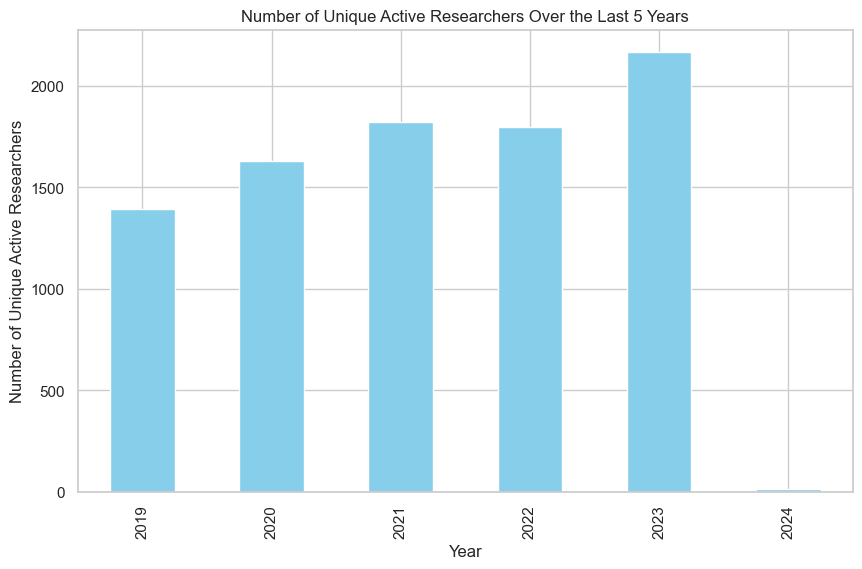

In [ ]:
#Plot the bar graph for Number of Unique Active Researchers over the last 5 years

# Count the number of unique active researchers for each year
researcher_counts = last_5_year_authors.groupby('Year')['AuthorLastname'].nunique()

plt.figure(figsize=(10, 6)) #Define the size of the figure
researcher_counts.plot(kind='bar', color='skyblue') #Define the bar plot
plt.xlabel('Year') #Label the x-axis
plt.ylabel('Number of Unique Active Researchers') #Label the y-axis
plt.title('Number of Unique Active Researchers Over the Last 5 Years') #Label the title of the plot
plt.show() #Display the graph

In [ ]:
#Extract the first authors for last 5 years
student_papers=last_5_year_authors[(last_5_year_authors['AuthorN']==1)]
student_papers

PMID                                              Title  \
0      28802642  Prognostic Value of TERT Alterations, Mutation...   
19     29489509  The Amount of Melanin Influences p16 Loss in S...   
26     29915929  Identification of miR-146a is Associated with ...   
31     29966470  Deletion of CDKN2A/B is associated with inferi...   
40     30009659  Primary Esophageal Mixed Sarcomatoid and Small...   
...         ...                                                ...   
11646  38067238  Validation of a Gene Expression Approach for t...   
11653  38070141  Has-miR-300-GADD45B promotes melanoma growth v...   
11660  38079020  "De novo replication repair deficient glioblas...   
11690  38091828  Dry and wet experiments reveal diagnostic clus...   
11710  38095311  Compliant substrates mitigate the senescence a...   

                                                Abstract       ISSN  \
0      Point mutations in the TERT gene promoter occu...  2405-4569   
19     The risk assessment of spitzoid lesions is one...  1533-4058   
26     There is emerging evidence that some microRNAs...  1532-2807   
31     Considering conflicting data on CDKN2A/B delet...  1029-2403   
40     Mixed carcinomas in the esophagus are highly u...  1940-2465   
...                                                  ...        ...   
11646  Cytological diagnosis of pleural mesothelioma ...  2072-6694   
11653  Response to oncogenic factors like UV, GADD45 ...  1945-4589   
11660  Glioblastoma is a clinically and molecularly h...  1432-0533   
11690  Cuproptosis is a new manner of mitochondrial c...  1878-1705   
11710  Mesenchymal stromal cells (MSCs) are a promisi...  1552-4965   

                                                 Journal  \
0                                 European urology focus   
19     Applied immunohistochemistry & molecular morph...   
26                     Pathology oncology research : POR   
31                                   Leukemia & lymphoma   
40           International journal of surgical pathology   
...                                                  ...   
11646                                            Cancers   
11653                                              Aging   
11660                              Acta neuropathologica   
11690                   International immunopharmacology   
11710   Journal of biomedical materials research. Part A   

                    Location  Year FirstAuthorForename   FirstAuthorLastname  \
0                (5) 201-204  2019               Sumit              Isharwal   
19              (27) 423-429  2019            Carolina  Martinez Ciarpaglini   
26              (26) 245-251  2020             Yanping                 Zhang   
31              (60) 433-441  2019                   M            Kathiravan   
40                (27) 84-88  2019       Christopher J              Schwartz   
...                      ...   ...                 ...                   ...   
11646                   5534  2023            Rossella                 Bruno   
11653  10.18632/aging.205276  2023                Long                  Chen   
11660                (147) 3  2023                Sara                 Hadad   
11690           (127) 111326  2023                Peng                 Zhang   
11710    10.1002/jbm.a.37657  2023          Robert C H               Gresham   

      FirstAuthorInitials                             FirstAuthorAffiliation  \
0                       S  Urology Service, Department of Surgery, Memori...   
19                      C             Biomedical Research Institute INCLIVA.   
26                      Y  Department of Clinical Medicine, Changde Vocat...   
31                      M  a Paediatric Haematology-Oncology Unit , Post ...   
40                     CJ  1 New York University Medical Center, New York...   
...                   ...                                                ...   
11646                   R  Unit of Pathological Anatomy, University Hospi..

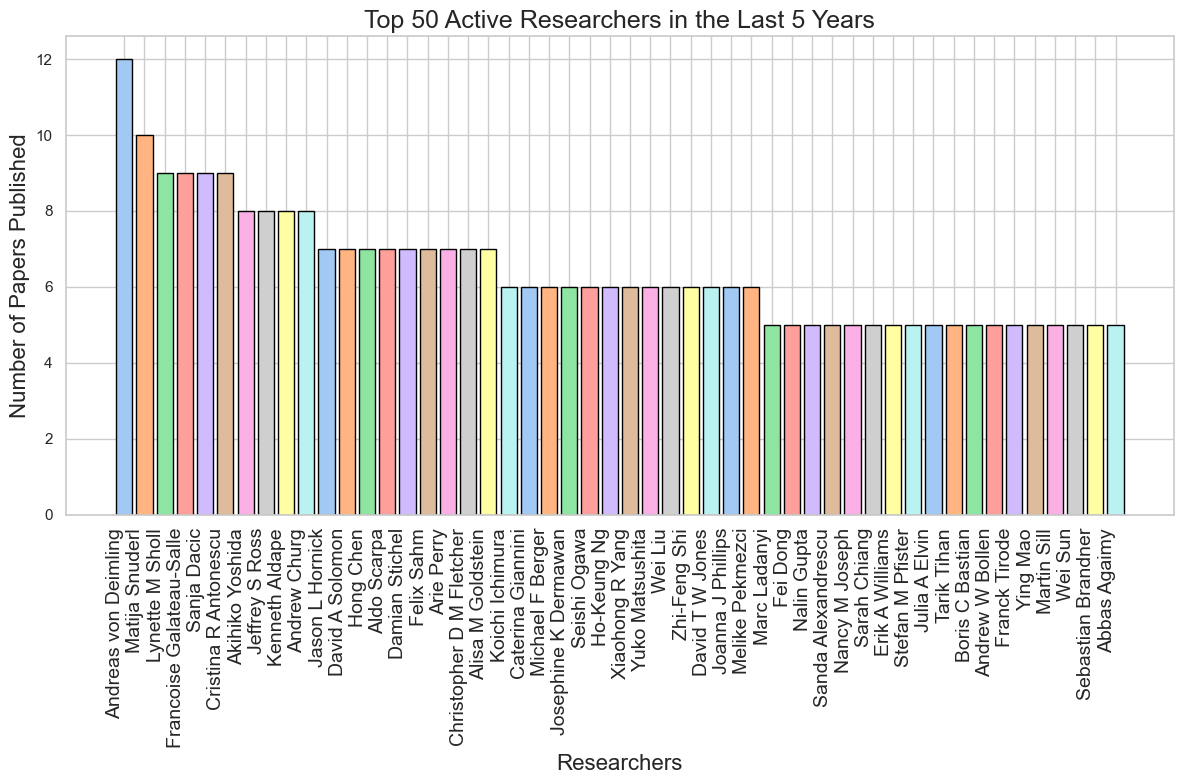

In [ ]:
#Plot a bar graph for Top 50 Active Researchers in the Last 5 years

# Combine first and last names for each researcher
last_5_year_authors['Fullname'] = last_5_year_authors['AuthorForename'] + ' ' + last_5_year_authors['AuthorLastname']

# Count the number of papers published by each researcher
researcher_paper_counts = last_5_year_authors['Fullname'].value_counts()

# Select the top N researchers
top_n = 50
top_researchers = researcher_paper_counts.head(top_n)

sns.set(style="whitegrid") #Set the grid of the graph

plt.figure(figsize=(12, 8)) #Define the size of the figure
colors = sns.color_palette("pastel") #Define the colour palette for the graph

plt.bar(top_researchers.index, top_researchers, color=colors, edgecolor='black') # Use a horizontal bar chart with a different color for each bar

plt.xlabel('Researchers', fontsize=16) #Label the x-axis and font size
plt.ylabel('Number of Papers Published', fontsize=16) #Label the y-axis and font size
plt.title(f'Top {top_n} Active Researchers in the Last 5 Years', fontsize=18) #Label the title of the graph

plt.xticks(rotation=90, ha='right', fontsize=14) # Rotating x-axis labels for better readability

plt.tight_layout() #Display the layout of the graph

plt.show() # Display the plot

C:\Users\HP\AppData\Local\Temp\ipykernel_27600\4015527867.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  student_papers['Fullname'] = student_papers['AuthorForename'] + ' ' + student_papers['AuthorLastname']


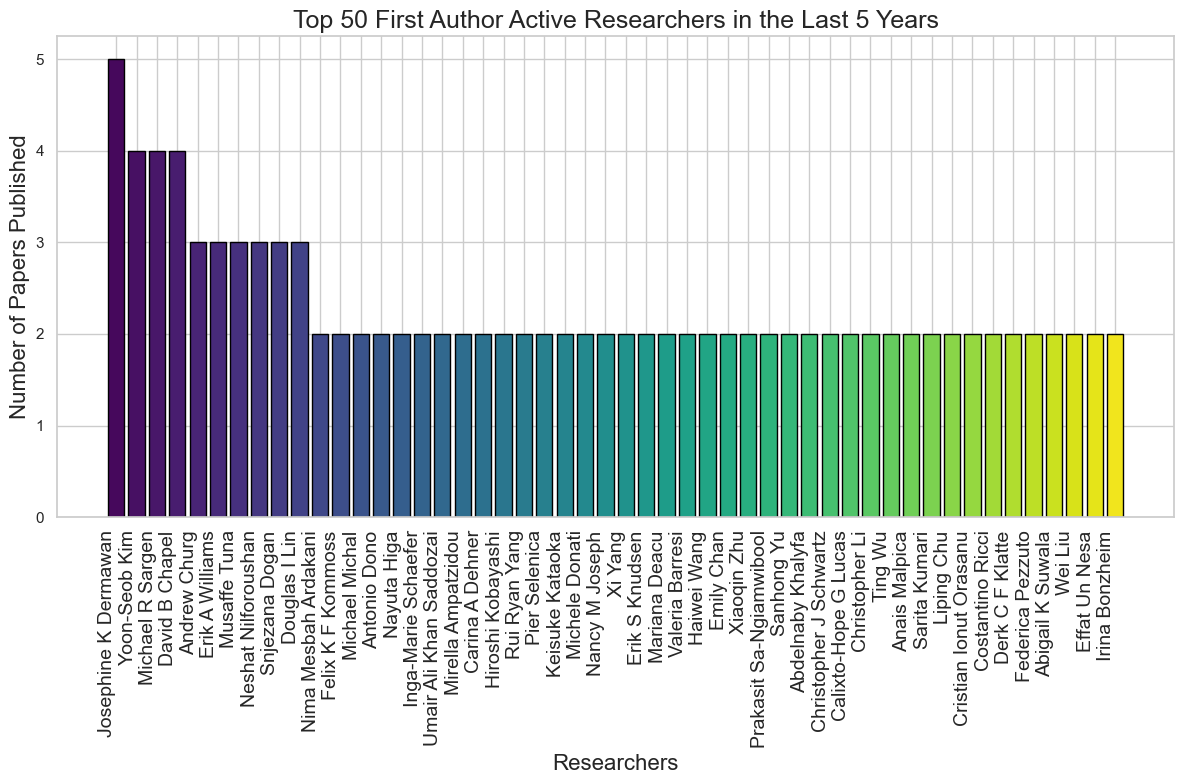

In [ ]:
#Plot the bar graph for Top 50 First Author Active Researchers in the Last 5 years

# Combine first and last names for each researcher
student_papers['Fullname'] = student_papers['AuthorForename'] + ' ' + student_papers['AuthorLastname']

# Count the number of papers published by each researcher
researcher_paper_counts = student_papers['Fullname'].value_counts()

# Select the top N researchers
top_n = 50
top_researchers = researcher_paper_counts.head(top_n)

sns.set(style="whitegrid") #Set the grid of the graph

plt.figure(figsize=(12, 8)) #Size of the graph
colors = sns.color_palette("viridis", len(top_researchers))

plt.bar(top_researchers.index, top_researchers, color=colors, edgecolor='black') #Define the parameters of the graph

# Adding labels and title with larger font sizes
plt.xlabel('Researchers', fontsize=16) #Label the x-axis and the font size
plt.ylabel('Number of Papers Published', fontsize=16) #Label the y-axis and the font size
plt.title(f'Top {top_n} First Author Active Researchers in the Last 5 Years', fontsize=18) #Label the title of the graph

plt.xticks(rotation=90, ha='right', fontsize=14) # Rotating x-axis labels for better readability

plt.tight_layout() #Define the layout of the graph

plt.show() # Display the plot

In [ ]:
#Extract the list of 5th Authors and considering them as Supervisors
supervisors=last_5_year_authors[(last_5_year_authors['AuthorN']==5)]
supervisors

PMID                                              Title  \
4      28802642  Prognostic Value of TERT Alterations, Mutation...   
23     29489509  The Amount of Melanin Influences p16 Loss in S...   
30     29915929  Identification of miR-146a is Associated with ...   
35     29966470  Deletion of CDKN2A/B is associated with inferi...   
44     30009659  Primary Esophageal Mixed Sarcomatoid and Small...   
...         ...                                                ...   
11650  38067238  Validation of a Gene Expression Approach for t...   
11657  38070141  Has-miR-300-GADD45B promotes melanoma growth v...   
11664  38079020  "De novo replication repair deficient glioblas...   
11694  38091828  Dry and wet experiments reveal diagnostic clus...   
11714  38095311  Compliant substrates mitigate the senescence a...   

                                                Abstract       ISSN  \
4      Point mutations in the TERT gene promoter occu...  2405-4569   
23     The risk assessment of spitzoid lesions is one...  1533-4058   
30     There is emerging evidence that some microRNAs...  1532-2807   
35     Considering conflicting data on CDKN2A/B delet...  1029-2403   
44     Mixed carcinomas in the esophagus are highly u...  1940-2465   
...                                                  ...        ...   
11650  Cytological diagnosis of pleural mesothelioma ...  2072-6694   
11657  Response to oncogenic factors like UV, GADD45 ...  1945-4589   
11664  Glioblastoma is a clinically and molecularly h...  1432-0533   
11694  Cuproptosis is a new manner of mitochondrial c...  1878-1705   
11714  Mesenchymal stromal cells (MSCs) are a promisi...  1552-4965   

                                                 Journal  \
4                                 European urology focus   
23     Applied immunohistochemistry & molecular morph...   
30                     Pathology oncology research : POR   
35                                   Leukemia & lymphoma   
44           International journal of surgical pathology   
...                                                  ...   
11650                                            Cancers   
11657                                              Aging   
11664                              Acta neuropathologica   
11694                   International immunopharmacology   
11714   Journal of biomedical materials research. Part A   

                    Location  Year FirstAuthorForename   FirstAuthorLastname  \
4                (5) 201-204  2019               Sumit              Isharwal   
23              (27) 423-429  2019            Carolina  Martinez Ciarpaglini   
30              (26) 245-251  2020             Yanping                 Zhang   
35              (60) 433-441  2019                   M            Kathiravan   
44                (27) 84-88  2019       Christopher J              Schwartz   
...                      ...   ...                 ...                   ...   
11650                   5534  2023            Rossella                 Bruno   
11657  10.18632/aging.205276  2023                Long                  Chen   
11664                (147) 3  2023                Sara                 Hadad   
11694           (127) 111326  2023                Peng                 Zhang   
11714    10.1002/jbm.a.37657  2023          Robert C H               Gresham   

      FirstAuthorInitials                             FirstAuthorAffiliation  \
4                       S  Urology Service, Department of Surgery, Memori...   
23                      C             Biomedical Research Institute INCLIVA.   
30                      Y  Department of Clinical Medicine, Changde Vocat...   
35                      M  a Paediatric Haematology-Oncology Unit , Post ...   
44                     CJ  1 New York University Medical Center, New York...   
...                   ...                                                ...   
11650                   R  Unit of Pathological Anatomy, University Hospi..

C:\Users\HP\AppData\Local\Temp\ipykernel_27600\2450863489.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  supervisors['Fullname'] = supervisors['AuthorForename'] + ' ' + supervisors['AuthorLastname']


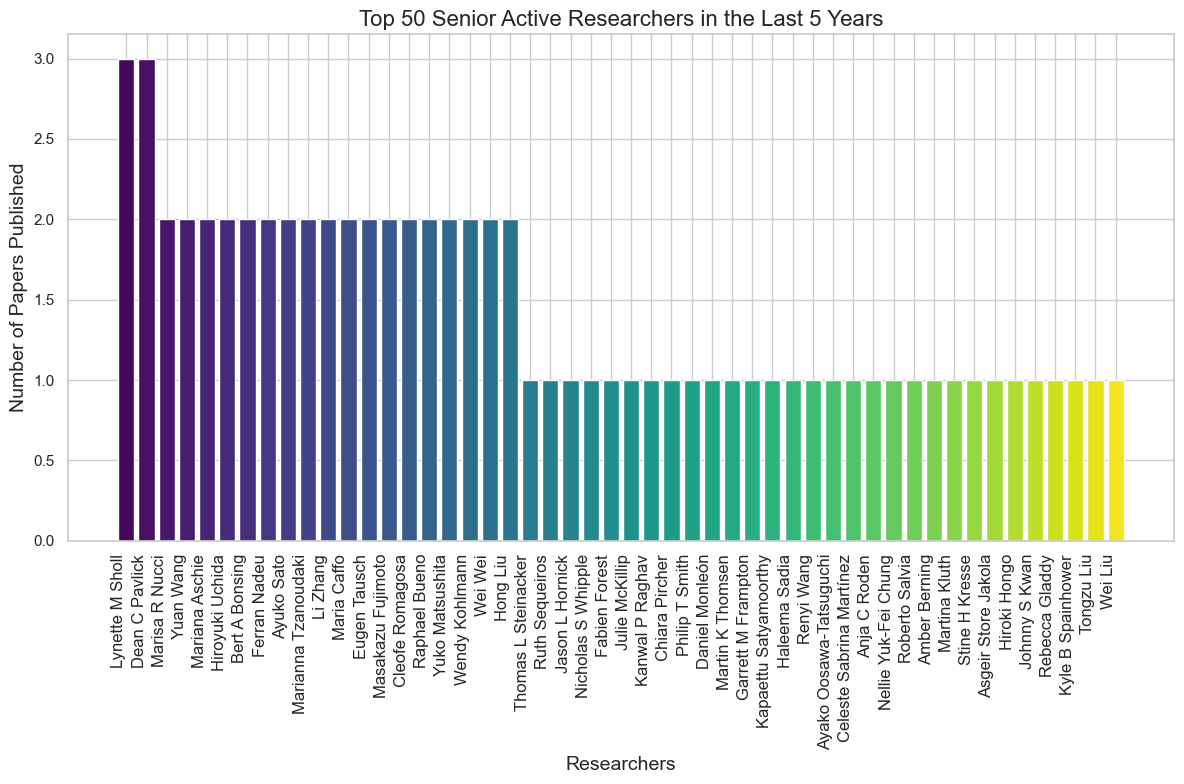

In [ ]:
# Combine first and last names for each researcher
supervisors['Fullname'] = supervisors['AuthorForename'] + ' ' + supervisors['AuthorLastname']

# Count the number of papers published by each researcher
researcher_paper_counts = supervisors['Fullname'].value_counts()

# Select the top N researchers
top_n = 50
top_researchers = researcher_paper_counts.head(top_n)

# Set a seaborn style for better aesthetics
sns.set(style="whitegrid") #Grid of the graph

# Create a vertical bar chart
plt.figure(figsize=(12, 8)) #Size of the figure
colors = sns.color_palette("viridis", len(top_researchers))  #Define the color palette

plt.bar(top_researchers.index, top_researchers, color=colors) #Define the parameters of the graph

plt.xlabel("Researchers", fontsize=14)  # Label the x-axis with font size
plt.ylabel("Number of Papers Published", fontsize=14)  # Label the y-axis with font size
plt.title(f"Top {top_n} Senior Active Researchers in the Last 5 Years", fontsize=16) #Label the title of the graph

plt.xticks(rotation=90, ha='right', fontsize=12) #Rotating x-axis labels for better readability

# plt.legend() #Add a legend

plt.tight_layout() #Display the layout of the graph
plt.show() # Display the plot


## **Cooperative and competitive relationships between active researchers.**

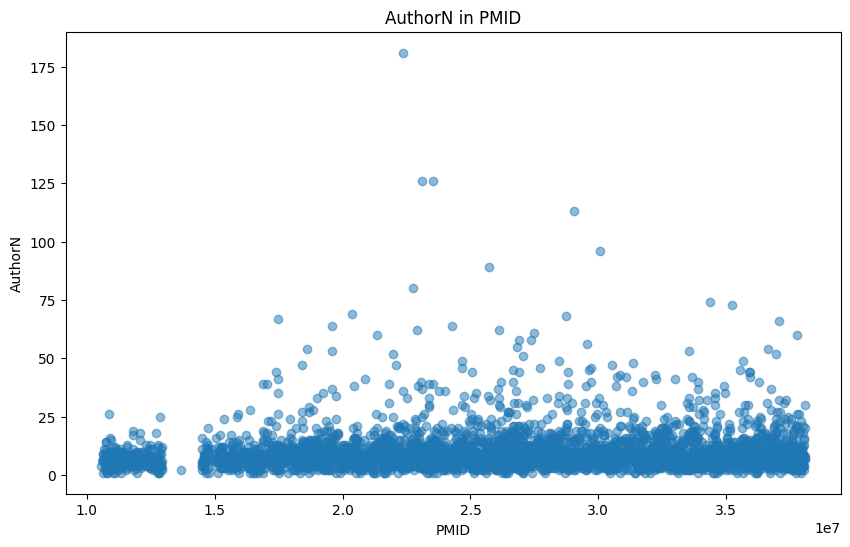

<ipython-input-2-99255b51b045>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_authors_data['Author Full Name'] = cleaned_authors_data['AuthorForename'] + ' ' + cleaned_authors_data['AuthorLastname']
<ipython-input-2-99255b51b045>:89: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  common_last_authors = set(last_authors[papers_author1]) & set(last_authors[papers_author2])
<ipython-input-2-99255b51b045>:89: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  common_last_authors = set(last_authors[papers_author1]) & set(last_authors[papers_author2])
<ipython-input-2-99255b51b045>:89: FutureWarning: Passing a se

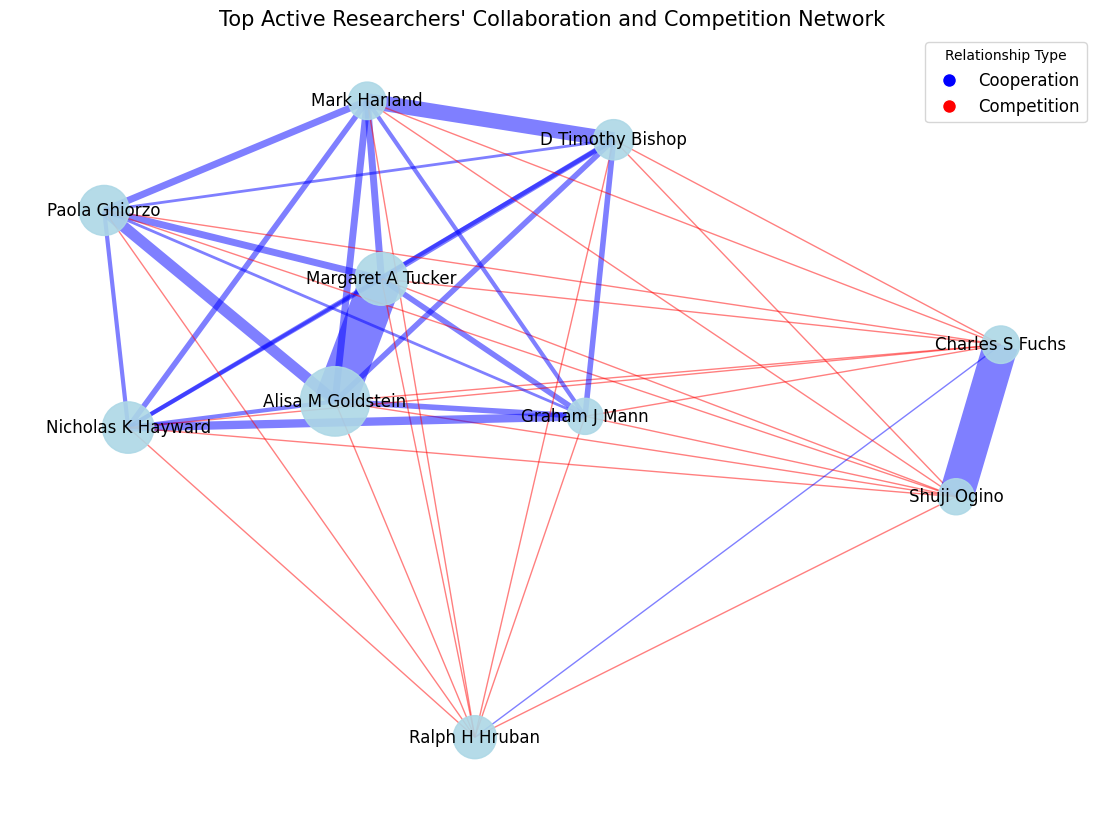

In [ ]:
#cleaning data

#check the author number in each paper
result = authors.groupby('PMID')['AuthorN'].agg('max')
result_data = result.reset_index()
#plot scatter about author number
x = result_data['PMID']
y = result_data['AuthorN']
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.5)
plt.title('AuthorN in PMID')
plt.xlabel('PMID')
plt.ylabel('AuthorN')
plt.show()

# Calculate the number of authors for each paper (PMID)
author_counts_per_paper = authors.groupby('PMID').size()

# Find the PMIDs of papers with more than 25 authors
papers_with_many_authors = author_counts_per_paper[author_counts_per_paper > 25].index

# Remove these papers from the dataset
cleaned_authors_data = authors[~authors['PMID'].isin(papers_with_many_authors)]

# Check the maximum AuthorN value after cleaning
max_author_n_after_cleaning = cleaned_authors_data['AuthorN'].max()

cleaned_authors_data['Author Full Name'] = cleaned_authors_data['AuthorForename'] + ' ' + cleaned_authors_data['AuthorLastname']

# Plot
authors['Author Full Name'] = authors['AuthorForename'] + ' ' + authors['AuthorLastname']

# Count the occurrences of all authors
all_author_counts = authors['Author Full Name'].value_counts()

# Get the top 10 most active researchers
top_10_active_researchers = all_author_counts.head(10).index.tolist()

# Select the data for the top 10 most active researchers
top_authors_df = cleaned_authors_data[cleaned_authors_data['Author Full Name'].isin(top_10_active_researchers)]

# Create a new graph
G_top = nx.Graph()

# Add nodes
G_top.add_nodes_from(top_10_active_researchers)

# Add collaboration edges
#Record the number of collaborations between each pair of authors
collaboration_counts = {}
# Traverse the author of each article according to PMID
for _, group in top_authors_df.groupby('PMID'):
    # Get a list of all the authors of this article
    authors = group['Author Full Name'].tolist()
    #loop over the authors list
    for i in range(len(authors)):
        for j in range(i + 1, len(authors)):
            #if they have edge,then the weight+1
            if G_top.has_edge(authors[i], authors[j]):
               G_top[authors[i]][authors[j]]['weight'] += 1
            #if they didn't edge before,then edge
            else:
                G_top.add_edge(authors[i], authors[j], weight=1, color='blue')
            #The dictionary records the number of times each pair of authors collaborated
            collaboration_counts[(authors[i], authors[j])] = G_top[authors[i]][authors[j]]['weight']

# Determine the last author
last_authors = cleaned_authors_data.groupby('PMID').last()['Author Full Name']

# Add competition edges
#loop over the top10 researchers list
for i in range(len(top_10_active_researchers)):
    for j in range(i + 1, len(top_10_active_researchers)):
        author1 = top_10_active_researchers[i]
        author2 = top_10_active_researchers[j]
        #if they didn't edge before, that means they didn't publish articles together, so we need to check the last author of their articles
        if not G_top.has_edge(author1, author2):
            # Get a PMID collection of articles for each researcher
            papers_author1 = set(cleaned_authors_data[cleaned_authors_data['Author Full Name'] == author1]['PMID'])
            papers_author2 = set(cleaned_authors_data[cleaned_authors_data['Author Full Name'] == author2]['PMID'])
            # Determine if there are common last authors through the intersection operator &
            common_last_authors = set(last_authors[papers_author1]) & set(last_authors[papers_author2])
            #if they didn't have the same last author of their articles, we would consider they are competition
            if not common_last_authors:
                G_top.add_edge(author1, author2, color='red')  # Competition edge

# Visualize the network graph
# Get the color of each edge
edge_colors = [G_top[u][v]['color'] for u,v in G_top.edges()]
# Gets the weight of each edge. The weight is used to represent the thickness of the edge
edge_weights = [G_top[u][v]['weight'] if 'weight' in G_top[u][v] else 1 for u,v in G_top.edges()]
# Use the square of activity and make sure the node is not too small, so set a minimum size
node_sizes = [max(all_author_counts[author]**2, 100) for author in top_10_active_researchers]

#plot
plt.figure(figsize=(14, 10))
pos = nx.spring_layout(G_top)  # Spring layout
nx.draw_networkx_nodes(G_top, pos, node_color='lightblue', node_size=node_sizes, alpha=0.9) # make the node size
nx.draw_networkx_edges(G_top, pos, edge_color=edge_colors, width=edge_weights, alpha=0.5)  # make the edges
nx.draw_networkx_labels(G_top, pos, font_size=12, font_family="sans-serif")  # make the labels
legend_labels = {'Cooperation': 'blue', 'Competition': 'red'}
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=key, markersize=10, markerfacecolor=value, linewidth=3) for key, value in legend_labels.items()]
plt.legend(handles=legend_handles, title='Relationship Type', loc='upper right', fontsize=12)
plt.title("Top Active Researchers' Collaboration and Competition Network", fontsize=15)
plt.axis('off')
plt.show()

**Number of CDKN2A papers and percentage in PubMed.**

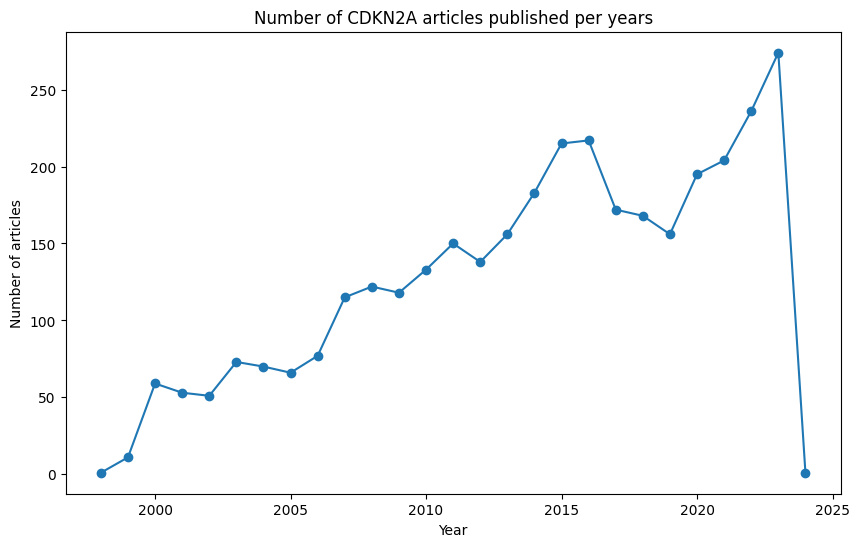

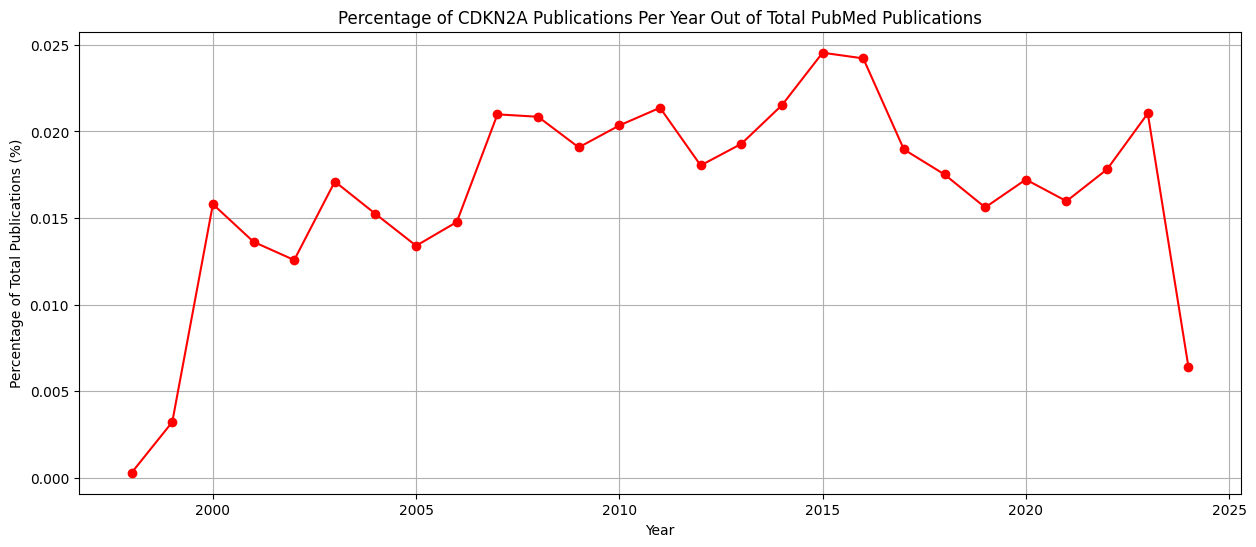

In [ ]:
#Number of CDKN2A papers
articles_counts = articles['Year'].value_counts().sort_index()

plt.figure(figsize=(10,6))
plt.plot(articles_counts.index,articles_counts.values, marker = 'o')
plt.xlabel("Year")
plt.ylabel("Number of articles")
plt.title("Number of CDKN2A articles published per years")

#Percentage in PubMed

# Rename the column in paper_counts_data for clarity
paper.rename(columns={'Count': 'TotalPapers'}, inplace=True)

# Count the number of CDKN2A articles per year
CDKN2A = articles.groupby('Year').size().reset_index(name='CDKN2ACount')

# Merge the CDKN2A per year with total paper counts per year
merged_data = pd.merge(CDKN2A, paper, on='Year')

# Calculate the percentage of CDKN2A publications out of total publications per year
merged_data['CDKN2APercentage'] = (merged_data['CDKN2ACount'] / merged_data['TotalPapers']) * 100

# Plotting the percentage trend
plt.figure(figsize=(15, 6))
plt.plot(merged_data['Year'], merged_data['CDKN2APercentage'], marker='o', color='red')
plt.title('Percentage of CDKN2A Publications Per Year Out of Total PubMed Publications')
plt.xlabel('Year')
plt.ylabel('Percentage of Total Publications (%)')
plt.grid(True)
plt.show()

## **Display the number of journals based on the first author and publication count.**

In [ ]:
pd.set_option('display.max_colwidth', 100)

# Filtering for only first authors in the 'authors' dataframe
first_authors = authors[authors['AuthorN'] == 1]

# Count the number of articles for each first author
first_author_article_counts = first_authors['AuthorLastname'].value_counts()

# Select the top 20 most active first authors
top_20_first_authors = first_author_article_counts.head(20)

# Merge 'articles' dataframe with 'first_authors' dataframe
merged_first_authors = pd.merge(first_authors, articles, on='PMID')

# Filter the merged dataframe for only the top 20 first authors
top_20_first_authors_articles = merged_first_authors[merged_first_authors['AuthorLastname'].isin(top_20_first_authors.index)]

# For each of the top 20 first authors, find the journal they have published in most frequently
top_journal_per_author = top_20_first_authors_articles.groupby('AuthorLastname')['Journal'].agg(lambda x: x.value_counts().index[0])

# Combine with the count of publications in that journal
top_journal_per_author_count = top_20_first_authors_articles.groupby(['AuthorLastname', 'Journal']).size().reset_index(name='Count')
top_journal_per_author_with_count = top_journal_per_author_count.loc[top_journal_per_author_count.groupby('AuthorLastname')['Count'].idxmax()]

# Formatting the results
formatted_top_journals_per_author = top_journal_per_author_with_count.apply(lambda x: f"{x['AuthorLastname']}: {x['Journal']} ({x['Count']})", axis=1)
formatted_top_journals_per_author.reset_index(drop=True, inplace=True)

# Displaying the formatted results
print(formatted_top_journals_per_author)

0                           Chen: Genes, chromosomes & cancer (2)
1                   Cheng: American journal of human genetics (1)
2                                         Gao: Carcinogenesis (1)
3                      Goldstein: Journal of medical genetics (3)
4                                 Hu: Brain research bulletin (1)
5                 Huang: Breast cancer research and treatment (1)
6          Jiang: Bioscience, biotechnology, and biochemistry (1)
7                                               Kim: PloS one (3)
8                                     Lee: Scientific reports (3)
9     Li: Biochemical and biophysical research communications (2)
10                                               Liu: Cancers (2)
11                                     Lynch: Familial cancer (3)
12                                     Ogino: Human pathology (3)
13                                      Wang: Cancer medicine (2)
14                                  Wu: Frontiers in oncology (2)
15        

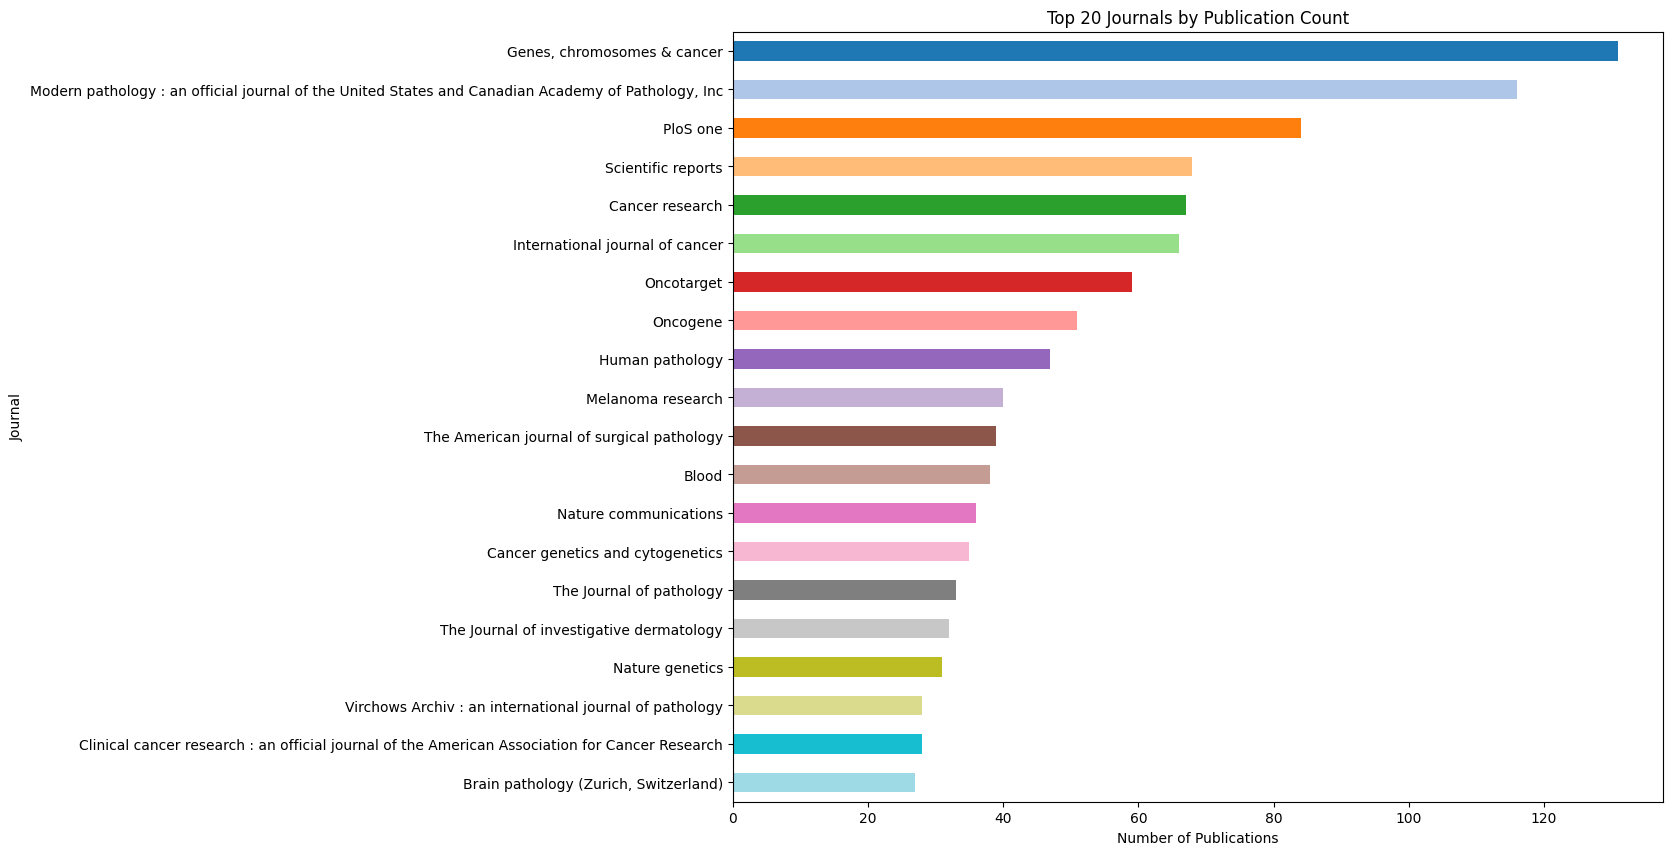

In [ ]:
# Counting the number of occurrences of each journal in the 'articles' dataframe
all_journal_counts = articles['Journal'].value_counts()

# Selecting the top 20 most common journals
top_20_journals = all_journal_counts.head(20)

# Creating a horizontal bar plot with distinct colors for each bar
plt.figure(figsize=(12, 10))
colors_top_20_journals = plt.colormaps['tab20'](range(len(top_20_journals)))  # Updated method to obtain colormap
top_20_journals.plot(kind='barh', color=colors_top_20_journals)
plt.title('Top 20 Journals by Publication Count')
plt.ylabel('Journal')
plt.xlabel('Number of Publications')
plt.gca().invert_yaxis()  # Inverting the y-axis so the journal with the most publications is on top
plt.show()

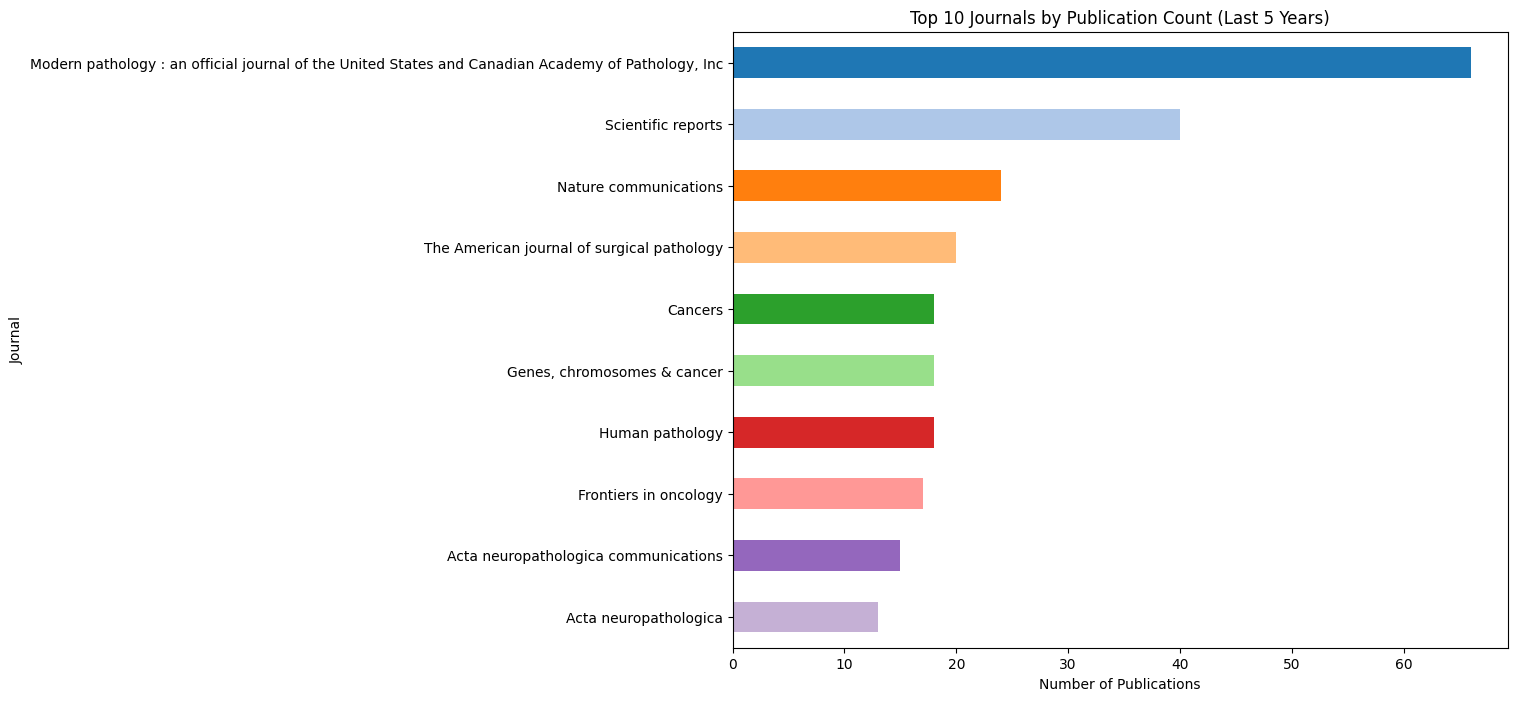

In [ ]:
# Filtering the articles dataframe for the last five years (2019-2023)
recent_articles_5y = articles[articles['Year'] >= 2019]

# Counting the number of occurrences of each journal in recent articles
recent_journal_counts_5y = recent_articles_5y['Journal'].value_counts()

# Selecting the top 10 most common journals in the last five years
top_10_recent_journals_5y = recent_journal_counts_5y.head(10)

# Creating a horizontal bar plot with distinct colors for the top 10 journals
plt.figure(figsize=(10, 8))
colors_recent_articles_5y = plt.get_cmap('tab20')(range(len(top_10_recent_journals_5y)))
top_10_recent_journals_5y.plot(kind='barh', color=colors_recent_articles_5y)
plt.title('Top 10 Journals by Publication Count (Last 5 Years)')
plt.ylabel('Journal')
plt.xlabel('Number of Publications')
plt.gca().invert_yaxis()  # Inverting the y-axis so the journal with the most publications is on top
plt.show()

## **Visualization of the number of authors and article regions.**

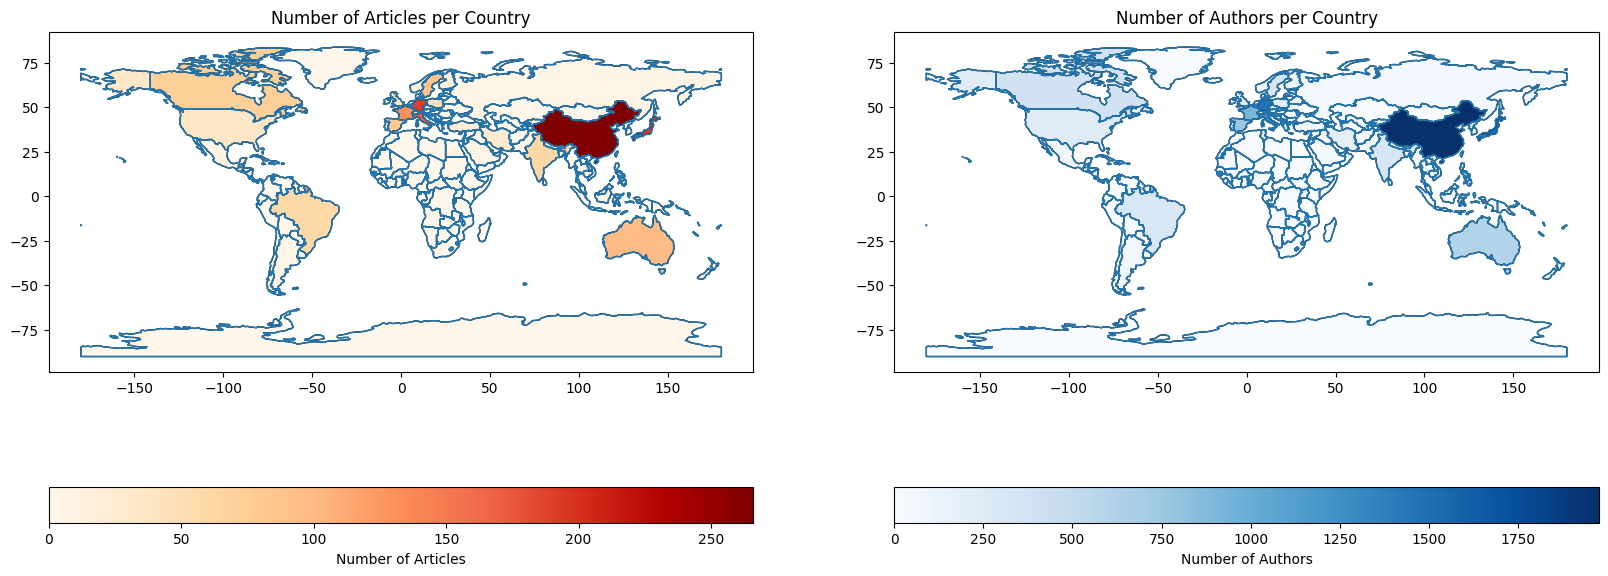

In [ ]:
def extract_country(affiliation):
    """
    Extract country name from author’s affiliation information
    从作者单位信息中提取国家名。
    """
    if pd.isna(affiliation):
        return "Unknown"
    try:
        country = affiliation.split(',')[-1].strip()
        country = re.sub(r"(University|Institute|Hospital|Department|College|School).*$", "", country).strip()
        return country
    except:
        return "Unknown"

# # Define function to clean extracted country names
# 定义函数以清理提取出的国家名
def clean_country_name(country):
    """
    Clean the extracted country names
    清理提取出的国家名。
    """
    country = re.sub(r"\..*|\s\-\s.*", "", country)
    return country

# Apply function to relevant columns
# 应用函数到相关列
articles['articles_country'] = articles['FirstAuthorAffiliation'].apply(extract_country).apply(clean_country_name)
authors['authors_country'] = authors['AuthorAffiliation'].apply(extract_country).apply(clean_country_name)

# Group by country and count the number of articles and authors
# 按国家分组并计算文章和作者的数量
articles_count = articles['articles_country'].value_counts().reset_index()
articles_count.columns = ['Country', 'ArticleCount']

authors_count = authors['authors_country'].value_counts().reset_index()
authors_count.columns = ['Country', 'AuthorCount']

# Use geopandas to read the downloaded .shp file
# 使用 geopandas 读取下载的 .shp 文件
world = gpd.read_file('mapdata/ne_110m_admin_0_countries.shp')

# Merge count with world map data
# 将计数与世界地图数据合并
world = world.merge(articles_count, left_on='ADMIN', right_on='Country', how='left')
world = world.merge(authors_count, left_on='ADMIN', right_on='Country', how='left')

# Fill NaN values ​​with 0
# 用0填充NaN值
world['ArticleCount'] = world['ArticleCount'].fillna(0)
world['AuthorCount'] = world['AuthorCount'].fillna(0)

# Draw the map: number of articles and number of authors
# 绘制地图：文章数量和作者数量
fig, ax = plt.subplots(1, 2, figsize=(20, 10))

# Article count map
# 文章数量地图
world.boundary.plot(ax=ax[0], linewidth=1)
world.plot(column='ArticleCount', ax=ax[0], legend=True,
           legend_kwds={'label': "Number of Articles", 'orientation': "horizontal"},
           cmap='OrRd', edgecolor='black')
ax[0].set_title('Number of Articles per Country')

# Map of number of authors
# 作者数量地图
world.boundary.plot(ax=ax[1], linewidth=1)
world.plot(column='AuthorCount', ax=ax[1], legend=True,
           legend_kwds={'label': "Number of Authors", 'orientation': "horizontal"},
           cmap='Blues', edgecolor='black')
ax[1].set_title('Number of Authors per Country')

plt.show()

In [ ]:
print(world.columns)

Index(['featurecla', 'scalerank', 'LABELRANK', 'SOVEREIGNT', 'SOV_A3',
       'ADM0_DIF', 'LEVEL', 'TYPE', 'TLC', 'ADMIN',
       ...
       'FCLASS_IT', 'FCLASS_NL', 'FCLASS_SE', 'FCLASS_BD', 'FCLASS_UA',
       'geometry', 'Country_x', 'ArticleCount', 'Country_y', 'AuthorCount'],
      dtype='object', length=173)


In [ ]:
# Define the function to generate Folium map
# 定义生成Folium地图的函数
def generate_folium_map(year=None):
    if year is None:
        # Process all data
        # 处理所有数据
        filtered_world = world.copy()
    else:
        # Process data for a specific year
        # 处理特定年份的数据
        filtered_articles = articles[articles['Year'] == year]
        filtered_authors = authors[authors['PMID'].isin(filtered_articles['PMID'])]
        filtered_world = world.copy()
        filtered_world = filtered_world.merge(filtered_articles[['articles_country', 'PMID']], left_on='ADMIN', right_on='articles_country', how='left')
        filtered_world = filtered_world.merge(filtered_authors[['authors_country', 'PMID']], left_on='ADMIN', right_on='authors_country', how='left')
        filtered_world['ArticleCount'] = filtered_world.groupby('ADMIN')['PMID_x'].transform('count').fillna(0)
        filtered_world['AuthorCount'] = filtered_world.groupby('ADMIN')['PMID_y'].transform('count').fillna(0)

    #Create a basic map
    # 创建基本地图
    m = folium.Map(
        location = [0, 0], # Set the map center position coordinates [latitude, longitude] # 设定地图中心位置坐标 [纬度, 经度]
        zoom_start = 2, # Set initial zoom level # 设定初始缩放级别
        min_zoom = 2, # Set minimum zoom level # 设定最小缩放级别
        max_bounds = True, # Turn on the maximum boundary limit of the map # 开启地图最大边界限制
        min_lon = -180, # Set the minimum longitude value # 设定最小经度值
        max_lon = 180, # Set the maximum longitude value # 设定最大经度值
        min_lat = -90, # Set the minimum latitude value # 设定最小纬度值
        max_lat = 90 # Set the maximum latitude value # 设定最大纬度值
    )
    # Convert GeoDataFrame to GeoJSON
    # 将 GeoDataFrame 转换为 GeoJSON
    world_geojson = filtered_world.to_json()

    # Add a layer using GeoJSON data
    # 添加一个图层，使用 GeoJSON 数据
    folium.Choropleth(
        geo_data=world_geojson,
        name='choropleth',
        data=filtered_world,
        columns=['ADMIN', 'ArticleCount'],
        key_on='feature.properties.ADMIN',
        fill_color='YlGnBu',
        fill_opacity=0.7,
        line_opacity=0.2,
        line_weight=0.3,
        legend_name='Number of Articles',
        vmin=0,  # Set minimum value # 设置最小值
        vmax=filtered_world['ArticleCount'].max()  # Set the maximum value based on the maximum value in the data # 设置最大值，根据数据中的最大值来设置
    ).add_to(m)

    # Add tooltip
    # 添加工具提示
    folium.GeoJson(
        world_geojson,
        name='Countries',
        tooltip=folium.GeoJsonTooltip(
            fields=['ADMIN', 'ArticleCount', 'AuthorCount'],
            aliases=['Country', 'Number of Articles', 'Number of Authors'],
            localize=True
        )
    ).add_to(m)

    # show map
    # 显示地图
    display(m)

    # Save map as HTML file
    # 保存地图为 HTML 文件
    m.save('my_map.html')

    # return m
# Slider control
# 滑块控件
year_slider = widgets.IntSlider(
    value=articles['Year'].min(),
    min=articles['Year'].min(),
    max=articles['Year'].max(),
    step=1,
    description='Select Year:',
    continuous_update=False
)

# Button control
# 按钮控件
show_all_button = widgets.Button(description='Show All Data')

# Slider callback function
# 滑块回调函数
def on_year_change(change):
    clear_output(wait=True)
    display(year_slider)
    display(show_all_button)
    generate_folium_map(change['new'])

#Button callback function
# 按钮回调函数
def on_show_all_clicked(b):
    clear_output(wait=True)
    display(year_slider)
    display(show_all_button)
    generate_folium_map()

#  Bind control
# 绑定控件
year_slider.observe(on_year_change, names='value')
show_all_button.on_click(on_show_all_clicked)

# Initially display all data
# 初始显示所有数据
display(year_slider)
display(show_all_button)
generate_folium_map()

IntSlider(value=1998, continuous_update=False, description='Select Year:', max=2024, min=1998)

Button(description='Show All Data', style=ButtonStyle())

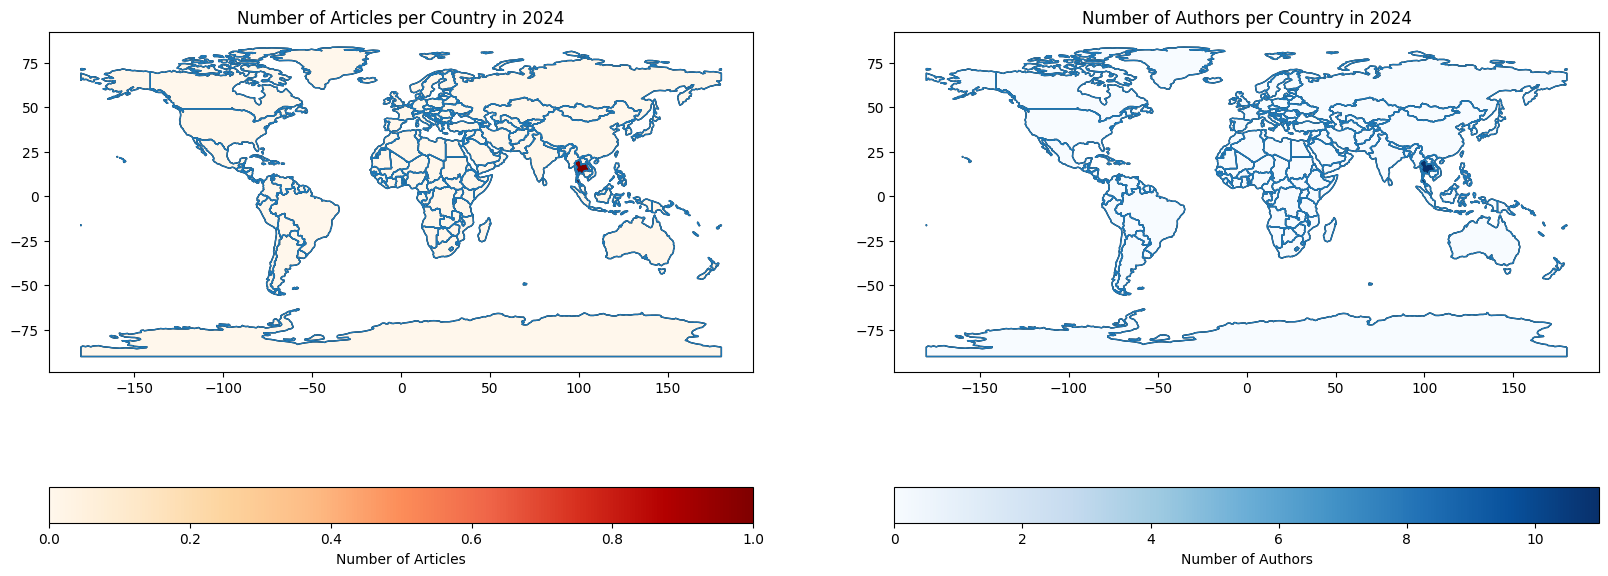

In [ ]:
# Get the year range
# 获取年份范围
year_range_5 = articles['Year'].unique()
year_range_5.sort()

# Set the path to the .shp file
# 设置.shp文件的路径
shp_file_path = 'mapdata/ne_110m_admin_0_countries.shp'

# Calculate the time period every 5 years
# 计算每5年的时间段
time_periods = [year_range_5[i:i+5] for i in range(0, len(year_range_5), 5)]

# Define a function to process and display data for each time period
# 定义一个函数来处理和显示每个时间段的数据
def process_and_plot_period(period, shp_file_path):
    # Get articles and authors within the time period
    # 获取时间段内的文章和作者
    filtered_articles_5 = articles[articles['Year'].isin(period)]
    filtered_authors_5 = authors[authors['PMID'].isin(filtered_articles_5['PMID'])]

    # Group by country and count the number of articles and authors
    # 按国家分组并计算文章和作者的数量
    articles_count = filtered_articles_5['articles_country'].value_counts().reset_index()
    articles_count.columns = ['Country', 'ArticleCount']
    authors_count = filtered_authors_5['authors_country'].value_counts().reset_index()
    authors_count.columns = ['Country', 'AuthorCount']

    # Use geopandas to read .shp files
    # 使用 geopandas 读取.shp文件
    world = gpd.read_file(shp_file_path)

    # Merge count with world map data
    # 将计数与世界地图数据合并
    world = world.merge(articles_count, left_on='ADMIN', right_on='Country', how='left')
    world = world.merge(authors_count, left_on='ADMIN', right_on='Country', how='left')

    # Fill NaN values ​​with 0
    # 用0填充NaN值
    world['ArticleCount'] = world['ArticleCount'].fillna(0)
    world['AuthorCount'] = world['AuthorCount'].fillna(0)

    # Draw the map: number of articles and number of authors
    # 绘制地图：文章数量和作者数量
    fig, ax = plt.subplots(1, 2, figsize=(20, 10))

    # Article count map
    # 文章数量地图
    world.boundary.plot(ax=ax[0], linewidth=1)
    world.plot(column='ArticleCount', ax=ax[0], legend=True,
               legend_kwds={'label': "Number of Articles", 'orientation': "horizontal"},
               cmap='OrRd', edgecolor='black')
    ax[0].set_title(f'Number of Articles per Country ({period[0]}-{period[-1]})')

    # Map of number of authors
    # 作者数量地图
    world.boundary.plot(ax=ax[1], linewidth=1)
    world.plot(column='AuthorCount', ax=ax[1], legend=True,
               legend_kwds={'label': "Number of Authors", 'orientation': "horizontal"},
               cmap='Blues', edgecolor='black')
    ax[1].set_title(f'Number of Authors per Country ({period[0]}-{period[-1]})')

    plt.show()

# Loop through each five-year period
# 循环处理每个五年时间段
for period in time_periods:
    clear_output(wait=True)  # Clear old output # 清除旧的输出
    process_and_plot_period(period, shp_file_path)
    time.sleep(2)  # Each update interval is 2 seconds # 每次更新间隔2秒


## **Visualization of the review papers**

<ipython-input-2-9c4d4f30a744>:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
<ipython-input-2-9c4d4f30a744>:18: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(selected_countries.geometry.centroid.x,
<ipython-input-2-9c4d4f30a744>:19: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  selected_countries.geometry.centroid.y,


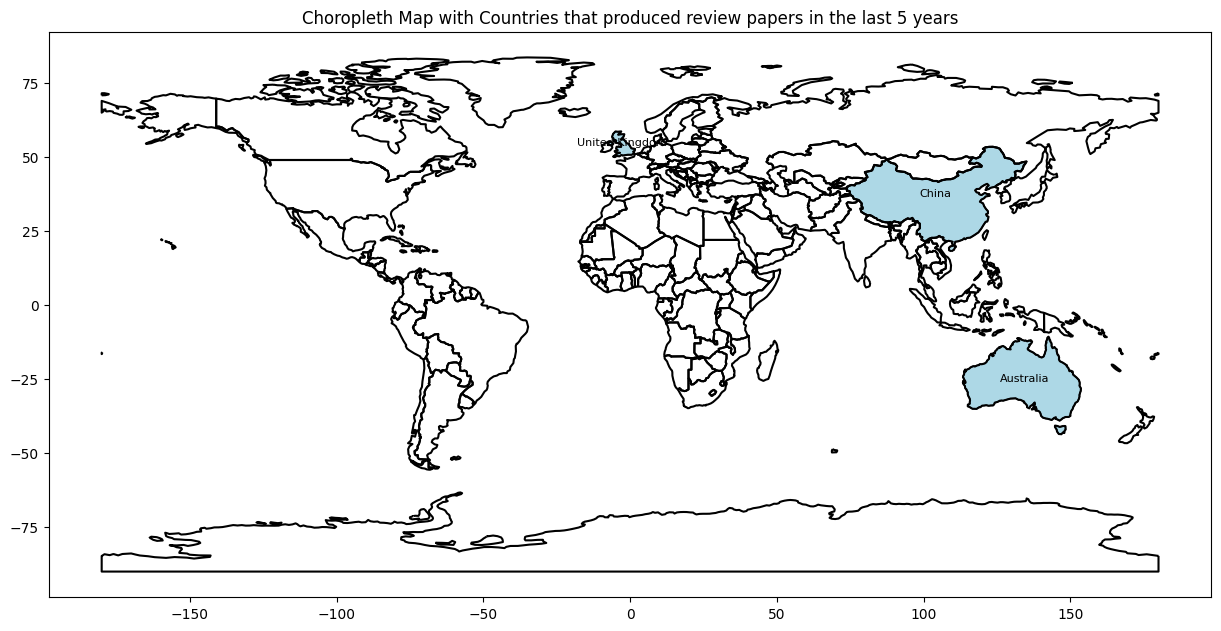

In [2]:
#all review papers last 5 years

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

countries_to_visualize = ['United States', 'United Kingdom', 'Australia', 'China']

selected_countries = world[world['name'].isin(countries_to_visualize)]

fig, ax = plt.subplots(1, 1, figsize=(15, 10))

world.boundary.plot(ax=ax, linewidth=1.5, color='black')
selected_countries.plot(ax=ax, color='lightblue', edgecolor='black')
for x, y, label in zip(selected_countries.geometry.centroid.x,
                       selected_countries.geometry.centroid.y,
                       selected_countries['name']):
    ax.text(x, y, label, fontsize=8, ha='center')

plt.title('Choropleth Map with Countries that produced review papers in the last 5 years')
plt.show()


<ipython-input-3-7f7945c38b1d>:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
<ipython-input-3-7f7945c38b1d>:20: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(selected_countries_review.geometry.centroid.x,
<ipython-input-3-7f7945c38b1d>:21: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  selected_countries_review.geometry.centroid.y,
<ipython-input-3-7f7945c38b1d>:25: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely

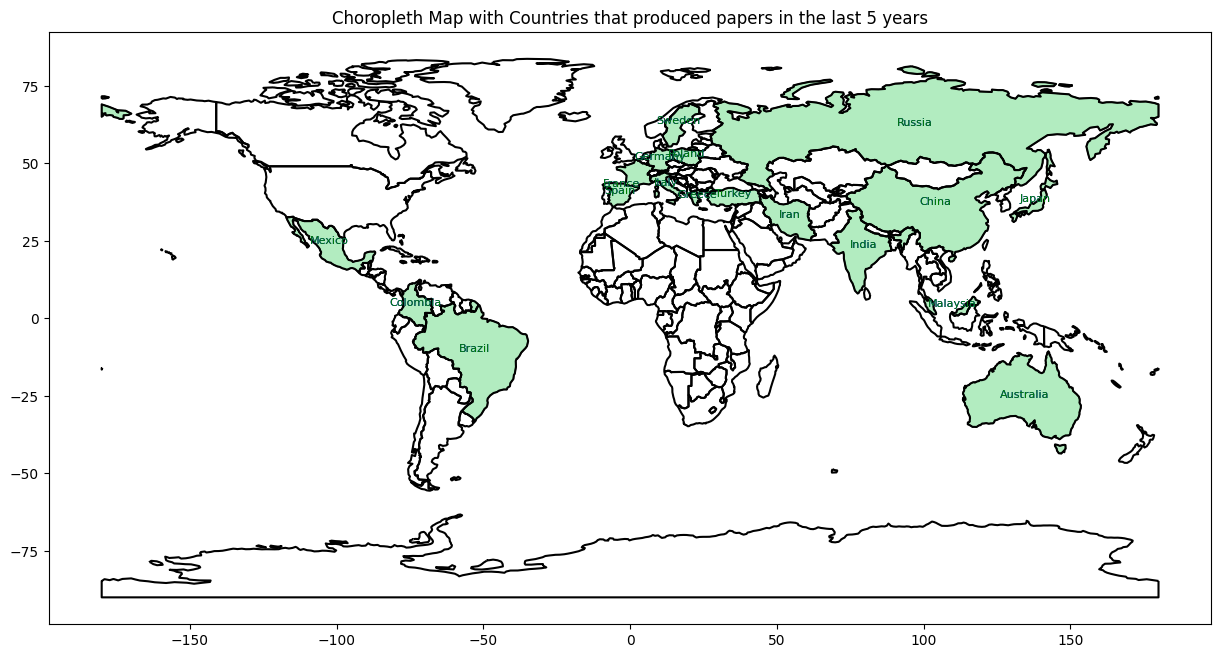

In [3]:
#all papers last 5 years/primary
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


countries_to_visualize_review = ['Sweden', 'USA', 'Japan', 'China', 'Turkey', 'Greece', 'Athens', 'Spain', 'Italy', 'Brazil', 'Russia', 'Malaysia' ,'Colombia', 'Australia', 'Iran' ,'Kingdom of Saudi Arabia' ,'France' ,'Germany' ,'France', 'The Netherlands', 'Republic of Korea', 'Poland', 'Mexico' ,'Czech Republic' ,'India' ,'Singapore']
countries_to_visualize_primary = ['Sweden', 'USA', 'Japan', 'China', 'Turkey', 'Greece', 'Athens', 'Spain', 'Italy', 'Brazil', 'Russia', 'Malaysia' ,'Colombia', 'Australia', 'Iran' ,'Kingdom of Saudi Arabia' ,'France' ,'Germany' ,'France', 'The Netherlands', 'Republic of Korea', 'Poland', 'Mexico' ,'Czech Republic' ,'India' ,'Singapore']

selected_countries_review = world[world['name'].isin(countries_to_visualize_review)]

selected_countries_primary = world[world['name'].isin(countries_to_visualize_primary)]

fig, ax = plt.subplots(1, 1, figsize=(15, 10))

world.boundary.plot(ax=ax, linewidth=1.5, color='black')

selected_countries_review.plot(ax=ax, color='lightblue', edgecolor='black', alpha=0.5)

selected_countries_primary.plot(ax=ax, color='lightgreen', edgecolor='black', alpha=0.5)

for x, y, label in zip(selected_countries_review.geometry.centroid.x,
                       selected_countries_review.geometry.centroid.y,
                       selected_countries_review['name']):
    ax.text(x, y, label, fontsize=8, ha='center', color='blue')

for x, y, label in zip(selected_countries_primary.geometry.centroid.x,
                       selected_countries_primary.geometry.centroid.y,
                       selected_countries_primary['name']):
    ax.text(x, y, label, fontsize=8, ha='center', color='green')

plt.title('Choropleth Map with Countries that produced papers in the last 5 years')
plt.show()

<ipython-input-4-f5310102a099>:12: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


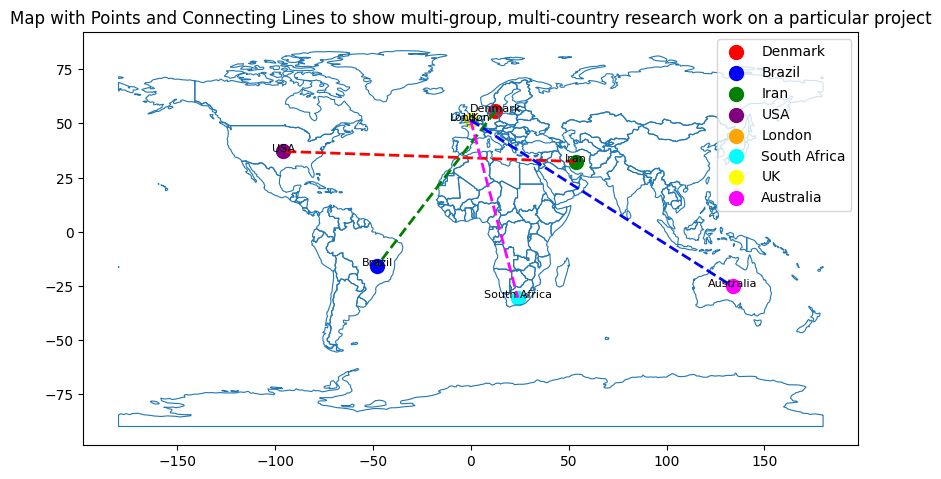

In [4]:
#line connections
denmark_point = gpd.GeoDataFrame(geometry=gpd.points_from_xy([12.5683], [55.6761]), crs="EPSG:4326")
brazil_point = gpd.GeoDataFrame(geometry=gpd.points_from_xy([-47.9292], [-15.7801]), crs="EPSG:4326")

iran_point = gpd.GeoDataFrame(geometry=gpd.points_from_xy([53.6880], [32.4279]), crs="EPSG:4326")
usa_point = gpd.GeoDataFrame(geometry=gpd.points_from_xy([-95.7129], [37.0902]), crs="EPSG:4326")
london_point = gpd.GeoDataFrame(geometry=gpd.points_from_xy([-0.1276], [51.5074]), crs="EPSG:4326")
south_africa_point = gpd.GeoDataFrame(geometry=gpd.points_from_xy([24.0113], [-30.5595]), crs="EPSG:4326")
uk_point = gpd.GeoDataFrame(geometry=gpd.points_from_xy([-0.1276], [51.5074]), crs="EPSG:4326")
australia_point = gpd.GeoDataFrame(geometry=gpd.points_from_xy([133.7751], [-25.2744]), crs="EPSG:4326")

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

fig, ax = plt.subplots(figsize=(10, 6))
world.boundary.plot(ax=ax, linewidth=0.8)

denmark_point.plot(ax=ax, color='red', marker='o', label='Denmark', markersize=100)
brazil_point.plot(ax=ax, color='blue', marker='o', label='Brazil', markersize=100)
iran_point.plot(ax=ax, color='green', marker='o', label='Iran', markersize=100)
usa_point.plot(ax=ax, color='purple', marker='o', label='USA', markersize=100)
london_point.plot(ax=ax, color='orange', marker='o', label='London', markersize=100)
south_africa_point.plot(ax=ax, color='cyan', marker='o', label='South Africa', markersize=100)
uk_point.plot(ax=ax, color='yellow', marker='o', label='UK', markersize=100)
australia_point.plot(ax=ax, color='magenta', marker='o', label='Australia', markersize=100)

ax.plot([12.5683, -47.9292], [55.6761, -15.7801], color='green', linestyle='dashed', linewidth=2)  # Denmark to Brazil
ax.plot([53.6880, -95.7129], [32.4279, 37.0902], color='red', linestyle='dashed', linewidth=2)  # Iran to USA
ax.plot([-0.1276, 24.0113], [51.5074, -30.5595], color='magenta', linestyle='dashed', linewidth=2)  # London to South Africa
ax.plot([-0.1276, 133.7751], [51.5074, -25.2744], color='blue', linestyle='dashed', linewidth=2)  # UK to Australia

ax.text(12.5683, 55.6761, 'Denmark', fontsize=8, ha='center')
ax.text(-47.9292, -15.7801, 'Brazil', fontsize=8, ha='center')
ax.text(53.6880, 32.4279, 'Iran', fontsize=8, ha='center')
ax.text(-95.7129, 37.0902, 'USA', fontsize=8, ha='center')
ax.text(-0.1276, 51.5074, 'London', fontsize=8, ha='center')
ax.text(24.0113, -30.5595, 'South Africa', fontsize=8, ha='center')
ax.text(-0.1276, 51.5074, 'UK', fontsize=8, ha='center')
ax.text(133.7751, -25.2744, 'Australia', fontsize=8, ha='center')

ax.legend()

plt.title('Map with Points and Connecting Lines to show multi-group, multi-country research work on a particular project')
plt.show()


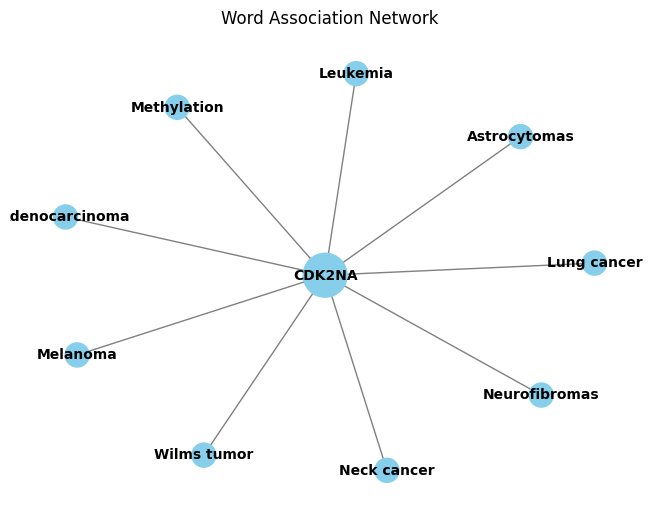

In [17]:
#technical terms
#word association network x

terms = ['Neurofibromas', 'Melanoma', 'Astrocytomas', 'Adenocarcinoma',
         'Lung cancer', 'Neck cancer', 'Leukemia', 'Methylation', 'Wilms tumor', 'CDK2NA']


G = nx.Graph()

edges = [('CDK2NA', term) for term in terms if term != 'CDK2NA']
G.add_edges_from(edges)

node_size = [1000 if node == 'CDK2NA' else 300 for node in G.nodes()]

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=node_size, node_color='skyblue', font_size=10, font_weight='bold', edge_color='gray')
plt.title('Word Association Network')
plt.show()





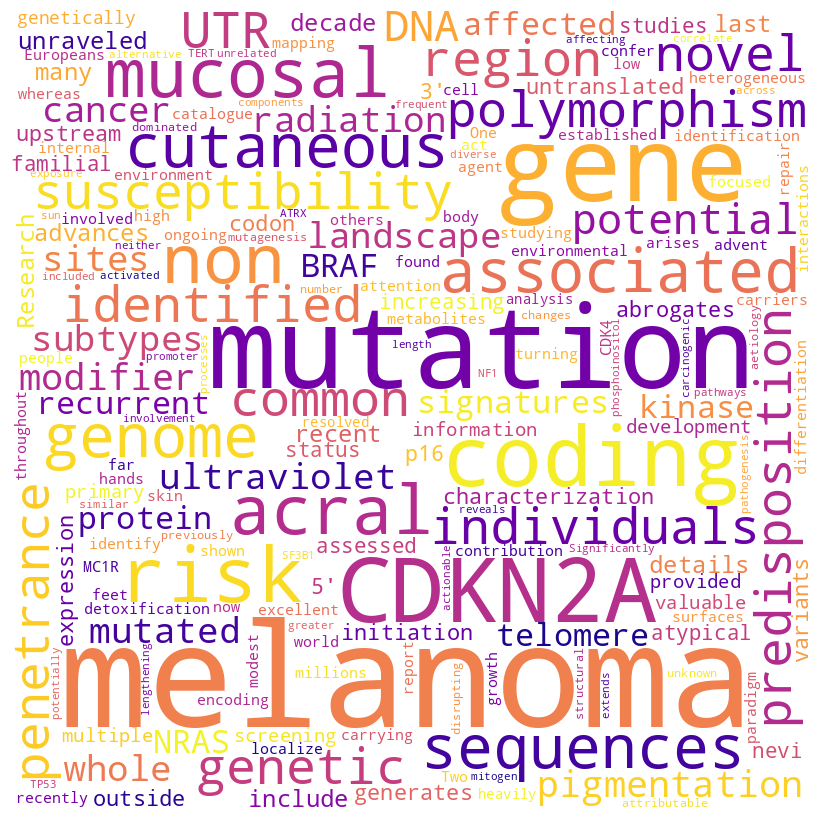

In [16]:
#cloud

word = 'Hayward'

filtered_df3 = articles[articles.apply(lambda row: row.astype(str).str.contains(word).any(), axis=1)]

filtered_df3

abstract_text = ' '.join(filtered_df3['Abstract'])


wordcloud = WordCloud(width=800, height=800,
                      background_color='white',
                      stopwords=None,
                      min_font_size=10,
                      colormap='plasma').generate(abstract_text)

plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()

In [6]:
#table top 3  authors and their papers

data = {
    'Author': ['Goldstein','Goldstein', 'Goldstein', 'Tucker', 'Tucker', 'Tucker', 'Hayward', 'Hayward', 'Hayward'],
    'Country': ['USA', 'USA', 'USA', 'USA', 'USA', 'USA', 'Australia', 'Australia', 'Australia'],
    'Title': ['Genotype-phenotype relationships in U.S. melanoma-prone families with CDKN2A and CDK4 mutations.', 'Gene-covariate interaction between dysplastic nevi and the CDKN2A gene in American melanoma-prone families.', 'A common founder for the V126D CDKN2A mutation in seven North American melanoma-prone families.', 'A natural history of melanomas and dysplastic nevi: an atlas of lesions in melanoma-prone families. ', 'Melanoma etiology: where are we?', 'Risks of Melanoma and Other Cancers in Melanoma-Prone Families over 4 Decades.', 'New developments in melanoma genetics.', 'Genetics of melanoma predisposition.', 'Whole-genome landscapes of major melanoma subtypes.'],
    'Abstract Summary': [
        'Two genes have been implicated in the development of cutaneous malignant melanoma (CMM). CDK4 (the gene encoding cyclin-dependent kinase 4, an oncogene) has exhibited germline mutations found in only three melanoma-prone families to date. CDKN2A is a tumor suppressor gene that encodes p16 (which inhibits activity of the cyclin D1-CDK4 complex) with germline mutations detected in 10%-25% of melanoma-prone families, some of whom are also prone to pancreatic cancer.',
        'The CDKN2A gene is associated with cutaneous malignant melanoma. While CDKN2A mutations increase melanoma risk, other factors like dysplastic nevi (DN), total nevi, and solar injury also contribute. A  gene-covariate interaction was found between DN and CDKN2A, especially notable in subjects without mutations. This interaction suggests a complex melanoma etiology, warranting further investigation',
        'One of the most common melanoma-related CDKN2A mutations reported in North America is the V126D mutation. We examined nine markers surrounding CDKN2A in three American and four Canadian families carrying the V126D mutation. All seven families had a haplotype consistent with a common ancestor/founder for this mutation. In addition, the mutation appears to have originated 34-52 generations ago (1-LOD-unit support interval 13-98 generations).',
        'Few long-term clinical and histologic data for melanocytic lesions have been available based on the mutation status of families at an increased risk of melanoma. In the current study, the authors describe the clinical and histologic features of dysplastic nevi and melanoma over time in families at an increased risk of melanoma with differing germline mutations in CDKN2A, CDK4, or not yet identified genes.',
        'Melanoma rates, especially in older men, are rapidly increasing, with thicker melanomas being more common in this demographic, leading to higher mortality and morbidity. While the exact reasons for this rise remain unclear, increased sun and UV exposure are major suspected factors. Two major melanoma susceptibility genes, CDKN2A and CDK4, have been identified, but they explain only a fraction of familial cases. Other high-risk genes are actively being sought, and studies suggest that gene penetrance may be influenced by other genetic or environmental factors. Dysplastic nevi and individual sun exposure history are significant risk factors for melanoma in European, North American, and Australian populations. Recent surveys in the US show widespread sunburn and tanning bed use, with sun protective behaviors lagging behind those in Australia, where melanoma rates are stabilizing.',
        'Since 1976, melanoma-prone families at the National Cancer Institute were monitored to identify causative factors. Among 1,226 members from 56 families, risks of primary melanoma decreased slightly over three calendar periods, but risks of subsequent melanomas were one-third after initial examination. All families were tested for CDKN2A and CDK4 mutations, with a 10-fold increased risk of second melanomas observed across all families, slightly higher in mutation-positive families, along with increased risks of pancreatic cancer post-melanoma in mutation-positive families, indicating decreased prospective melanoma risk over four decades despite increasing general population rates.',
        'Research over the last decade has unraveled many details of genetic susceptibility to melanoma, this study reviews this',
        'Predisposition to melanoma is genetically heterogeneous. Two high penetrance susceptibility genes, CDKN2A and CDK4, have so far been identified and mapping is ongoing to localize and identify others. With the advent of a catalogue of millions of potential DNA polymorphisms, attention is now also being focused on identification of genes that confer a more modest contribution to melanoma risk, such as those encoding proteins involved in pigmentation.One such pigmentation gene, MC1R, has not only been found to be a low penetrance melanoma gene but has also been shown to act as a genetic modifier of melanoma risk in individuals carrying CDKN2A mutations. Most recently, an environmental agent, ultraviolet radiation, has also been established as a modifier of melanoma risk in CDKN2A mutation carriers. Hence, melanoma is turning out to be an excellent paradigm for studying gene-gene and gene-environment interactions.',
        'Melanoma of the skin is a common cancer only in Europeans, whereas it arises in internal body surfaces (mucosal sites) and on the hands and feet (acral sites) in people throughout the world. Here we report analysis of whole-genome sequences from cutaneous, acral and mucosal subtypes of melanoma. The heavily mutated landscape of coding and non-coding mutations in cutaneous melanoma resolved novel signatures of mutagenesis attributable to ultraviolet radiation. However, acral and mucosal melanomas were dominated by structural changes and mutation signatures of unknown aetiology, not previously identified in melanoma. The number of genes affected by recurrent mutations disrupting non-coding sequences was similar to that affected by recurrent mutations to coding sequences. Significantly mutated genes included BRAF, CDKN2A, NRAS and TP53 in cutaneous melanoma, BRAF, NRAS and NF1 in acral melanoma and SF3B1 in mucosal melanoma. Mutations affecting the TERT promoter were the most frequent of all; however, neither they nor ATRX mutations, which correlate with alternative telomere lengthening, were associated with greater telomere length. Most melanomas had potentially actionable mutations, most in components of the mitogen-activated protein kinase and phosphoinositol kinase pathways. The whole-genome mutation landscape of melanoma reveals diverse carcinogenic processes across its subtypes, some unrelated to sun exposure, and extends potential involvement of the non-coding genome in its pathogenesis'
        ]
}


df = pd.DataFrame(data)


df


Author    Country                                              Title  \
0  Goldstein        USA  Genotype-phenotype relationships in U.S. melan...   
1  Goldstein        USA  Gene-covariate interaction between dysplastic ...   
2  Goldstein        USA  A common founder for the V126D CDKN2A mutation...   
3     Tucker        USA  A natural history of melanomas and dysplastic ...   
4     Tucker        USA                   Melanoma etiology: where are we?   
5     Tucker        USA  Risks of Melanoma and Other Cancers in Melanom...   
6    Hayward  Australia             New developments in melanoma genetics.   
7    Hayward  Australia               Genetics of melanoma predisposition.   
8    Hayward  Australia  Whole-genome landscapes of major melanoma subt...   

                                    Abstract Summary  
0  Two genes have been implicated in the developm...  
1  The CDKN2A gene is associated with cutaneous m...  
2  One of the most common melanoma-related CDKN2A...  
3  Few long-term clinical and histologic data for...  
4  Melanoma rates, especially in older men, are r...  
5  Since 1976, melanoma-prone families at the Nat...  
6  Research over the last decade has unraveled ma...  
7  Predisposition to melanoma is genetically hete...  
8  Melanoma of the skin is a common cancer only i...